# Importerer nødvendige biblioteker

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Task 1:
## Indlæsning af data
Der læses dataene fra to Excel-filer: en for rødvin og en for hvidvin.

In [4]:
# Indlæser rødvin og hvidvin fra Excel og bruger den anden række som header
rødvin = pd.read_excel("winequality-red.xlsx", header=1)
hvidvin = pd.read_excel("winequality-white.xlsx", header=1)

In [5]:
# Viser de første 5 rækker for rødvin
rødvin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Viser de første 5 rækker for hvidvin
hvidvin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Task 2:
## Rensning af data
Nu renses dataen for begge filer.

In [8]:
rødvin.info()
hvidvin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

Som vi kan se, er der ingen manglende data. Alligevel dobbelt-tjekkes der for at være helt sikker.

In [10]:
print("\nrødvin")
print(rødvin.isnull().sum())

print("\nhvidvin")
print(hvidvin.isnull().sum())


rødvin
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

hvidvin
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Som det fremgår, ser det ud til, at alle datatyperne er korrekte, og der er ingen manglende værdier i datasættet. Derfor vurderer vi, at der ikke er behov for rensning af dataene.

# Task 3:
## Sammenlægning af datasæt
Nu kombineres de to datasæt til et samlet datasæt.

In [13]:
# Tilføjer en kolonne til at angive, om data kommer fra rødvin eller hvidvin
rødvin['vin_type'] = 'red'  
hvidvin['vin_type'] = 'white'  

# Kombinerer de to datasæt
vin_data = pd.concat([rødvin.head(), hvidvin.head()])

## Tjek af det samlede datasæt
Nu ses det kombineret datasæt.

In [15]:
print("samlet datasæt:")
print(vin_data)

samlet datasæt:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.99

In [16]:
# Bare for at være sikker på, at det virker ordentligt, tages en tilfældig prøve.
print("tilfældig prøve:")
vin_data.sample(10)

tilfældig prøve:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vin_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


# Task 4:
## Udforskning af afhængige og uafhængige variabler
De tre dataframes udforskes, og de afhængige samt uafhængige variabler identificeres.

In [18]:
# Udforsker rødvin
print("Rødvin features:")
print(rødvin.columns)
print(rødvin.describe())

# Udforsker hvidvin
print("\nHvidvin features:")
print(hvidvin.columns)
print(hvidvin.describe())

# Udforsker samlet vin_data
print("\nSamlet vin_data features:")
print(vin_data.columns)
print(vin_data.describe())

Rødvin features:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'vin_type'],
      dtype='object')
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000         

De tre dataframes for rødvin, hvidvin og samlet vin indeholder 12 kemiske egenskaber samt en kvalitetsvurdering. Den afhængige variabel er quality, mens de øvrige kemiske egenskaber er de uafhængige variabler.

# Task 5:
## Transformation af kategoriske data til numeriske værdier
Variabelen vin_type, der indeholder tekstværdierne red og white, omdannes til numeriske værdier 0 og 1 ved hjælp af en kodningsteknik.

In [21]:
# Omdanner 'vin_type' fra tekst ('red'/'white') til tal (0/1)
vin_data['vin_type'] = vin_data['vin_type'].map({'red': 0, 'white': 1})

In [22]:
# Tjekker om kodningen er udført korrekt
print("\nDe første 10 rækker efter transformation af vin_type:")
print(vin_data[['vin_type']].head(10))


De første 10 rækker efter transformation af vin_type:
   vin_type
0         0
1         0
2         0
3         0
4         0
0         1
1         1
2         1
3         1
4         1


# Task 6:
## Beskrivende statistik for alle numeriske kolonner

In [24]:
vin_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vin_type
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.740000,0.463000,0.234000,5.68000,0.067700,26.200000,102.000000,0.996870,3.258000,0.521000,9.640000,5.600000,0.500000
std,1.314196,0.261153,0.204841,5.99459,0.018457,15.112908,61.645942,0.001963,0.155478,0.100161,0.374759,0.516398,0.527046
min,6.300000,0.230000,0.000000,1.60000,0.045000,11.000000,34.000000,0.994000,3.000000,0.400000,8.800000,5.000000,0.000000
25%,7.200000,0.272500,0.010000,1.90000,0.052000,14.250000,55.500000,0.995600,3.190000,0.442500,9.425000,5.000000,0.000000
50%,7.400000,0.290000,0.320000,2.45000,0.066500,21.000000,82.000000,0.996900,3.230000,0.525000,9.800000,6.000000,0.500000
75%,7.800000,0.700000,0.355000,8.10000,0.076000,41.250000,160.500000,0.997800,3.290000,0.575000,9.875000,6.000000,1.000000
max,11.200000,0.880000,0.560000,20.70000,0.098000,47.000000,186.000000,1.001000,3.510000,0.680000,10.100000,6.000000,1.000000


## Statistik for rødvin og hvidvin separat

In [26]:
vin_data.groupby("vin_type")[["quality", "alcohol", "residual sugar"]].agg(["mean", "median", "std", "min", "max"]) 

quality                          alcohol                              \
            mean median       std min max    mean median       std  min   max   
vin_type                                                                        
0            5.2    5.0  0.447214   5   6    9.64    9.8  0.219089  9.4   9.8   
1            6.0    6.0  0.000000   6   6    9.64    9.9  0.517687  8.8  10.1   

         residual sugar                              
                   mean median       std  min   max  
vin_type                                             
0                  2.12    1.9  0.319374  1.9   2.6  
1                  9.24    8.5  7.004855  1.6  20.7

## Normalfordeling
Histogrammerne med KDE viser fordelingen af de numeriske kolonner, og vurderer, om de følger en normalfordeling.

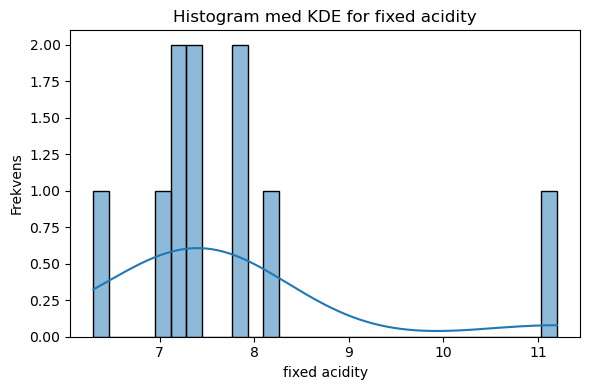

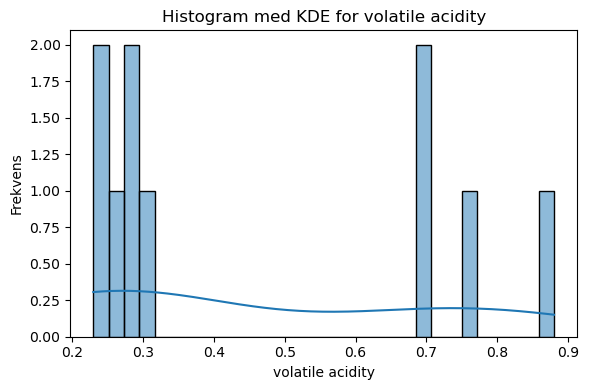

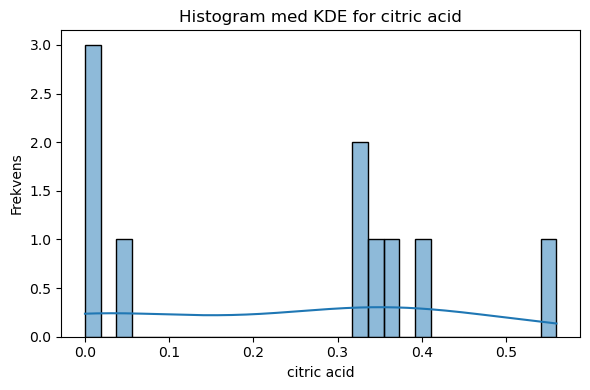

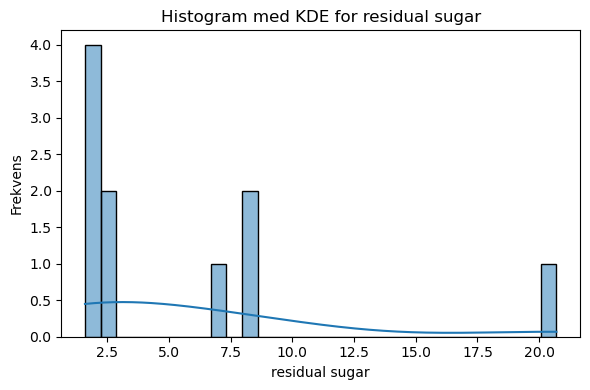

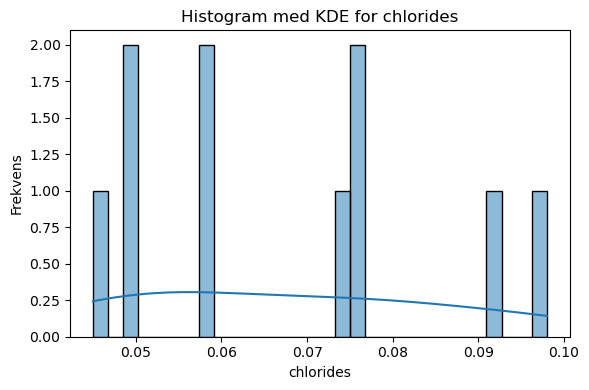

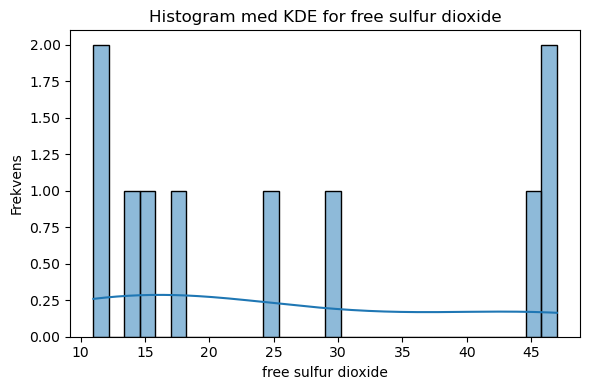

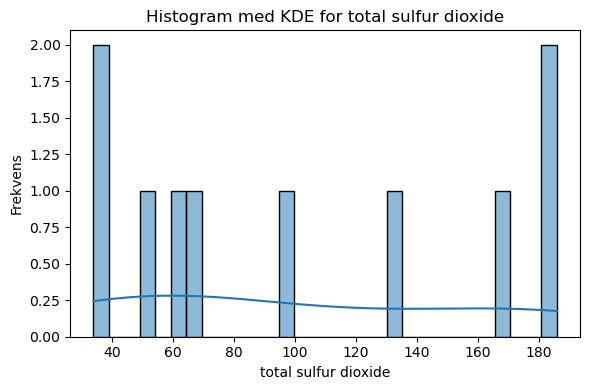

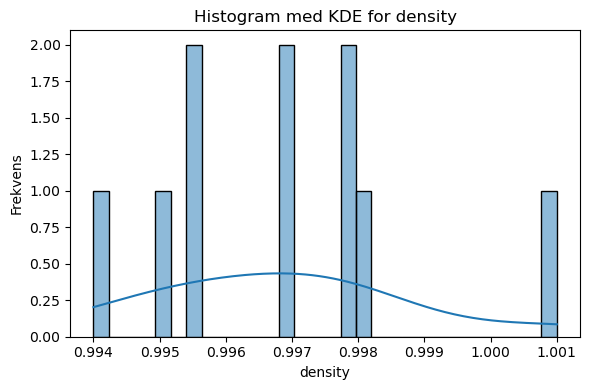

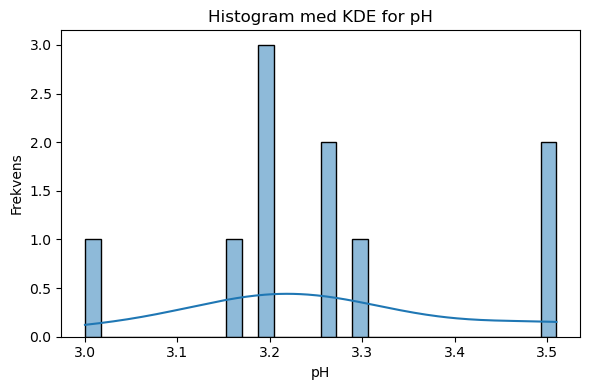

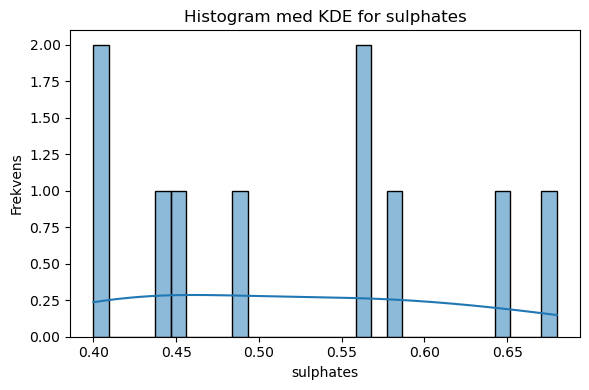

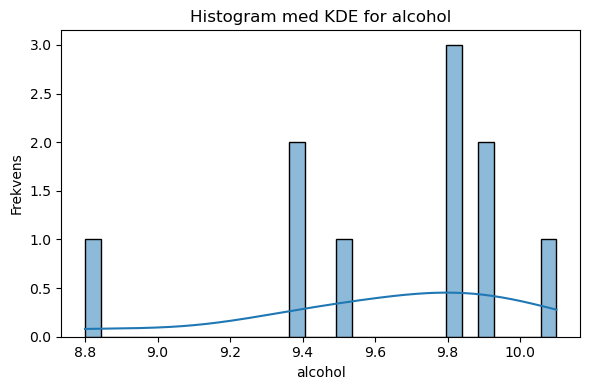

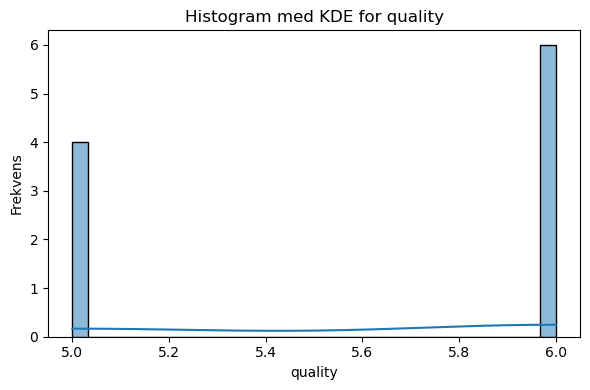

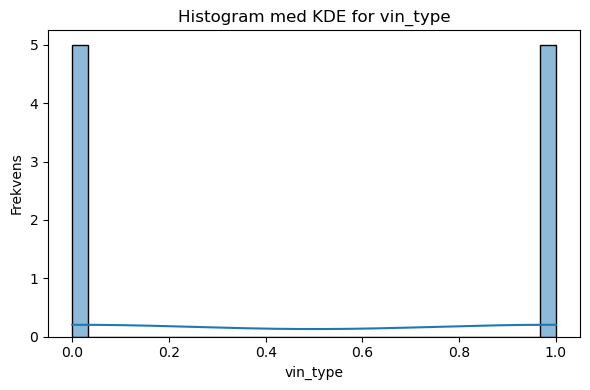

In [28]:
numeriske_kolonner = vin_data.select_dtypes(include='number').columns

for kolonne in numeriske_kolonner:
    plt.figure(figsize=(6, 4))
    sns.histplot(vin_data[kolonne], kde=True, bins=30)
    plt.title(f'Histogram med KDE for {kolonne}')
    plt.xlabel(kolonne)
    plt.ylabel("Frekvens")
    plt.tight_layout()
    plt.savefig(f'{kolonne}_histogram.png')
    plt.show()

Histogrammerne viser ikke normalfordeling. Kurverne er enten højreskæve, venstreskæve eller fladet ud.

# Task 7:
## Kvalitet – Sammenligning af gennemsnitlig kvalitet mellem rødvin og hvidvin
Nu sammenlignes gennemsnittene af kvaliteten for rødvin og hvidvin.

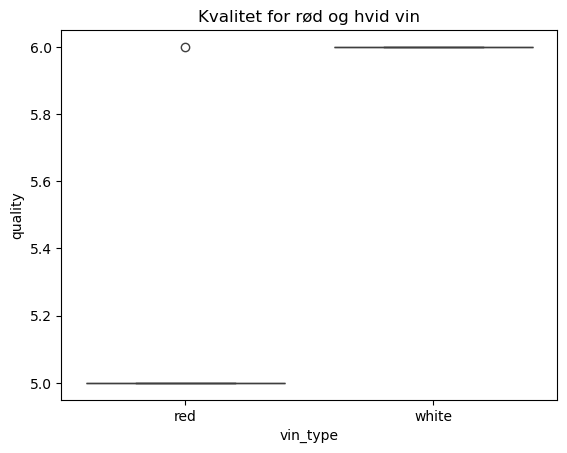

Gennemsnitlig kvalitet:
vin_type
red      5.2
white    6.0
Name: quality, dtype: float64


In [31]:
# Omdanner vin_type tilbage til tekst for bedre læsbarhed i grafer og grupperinger
# Tidligere var 'vin_type' kodet som 0 og 1 i opgave 5
vin_data['vin_type'] = vin_data['vin_type'].map({0: 'red', 1: 'white'})

# Boxplot for kvalitet
sns.boxplot(x='vin_type', y='quality', data=vin_data)
plt.title('Kvalitet for rød og hvid vin')
plt.show()

# Gennemsnit:
mean_quality = vin_data.groupby("vin_type")["quality"].mean()
print("Gennemsnitlig kvalitet:")
print(mean_quality)

diff = mean_quality['white'] - mean_quality['red']

Hvidvin har i gennemsnit 0.80 højere kvalitet end rødvin.

## Alkohol – Sammenligning af gennemsnitligt alkoholindhold mellem rødvin og hvidvin
Nu sammenlignes gennemsnittene af alkoholindholdet for rødvin og hvidvin.

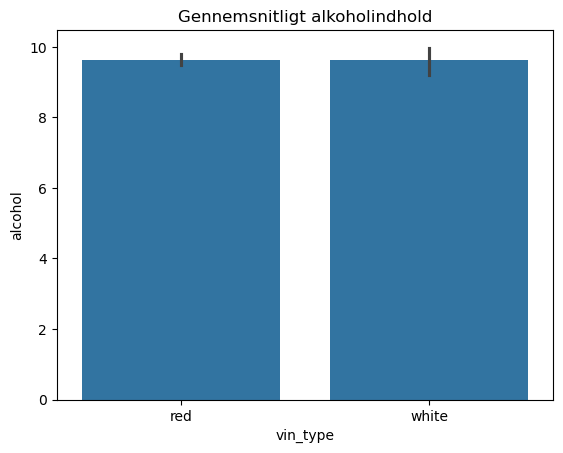


 Gennemsnitligt alkoholindhold:
vin_type
red      9.64
white    9.64
Name: alcohol, dtype: float64


In [34]:
sns.barplot(x='vin_type', y='alcohol', data=vin_data)
plt.title("Gennemsnitligt alkoholindhold")
plt.show()

print("\n Gennemsnitligt alkoholindhold:")
print(vin_data.groupby("vin_type")["alcohol"].mean())

Gennemsnitligt alkoholindhold er det samme for både rødvin og hvidvin, på 9.64%.

## Restsukker – Sammenligning af gennemsnitligt restsukker mellem rødvin og hvidvin
Nu sammenlignes gennemsnittene af restsukker for rødvin og hvidvin.

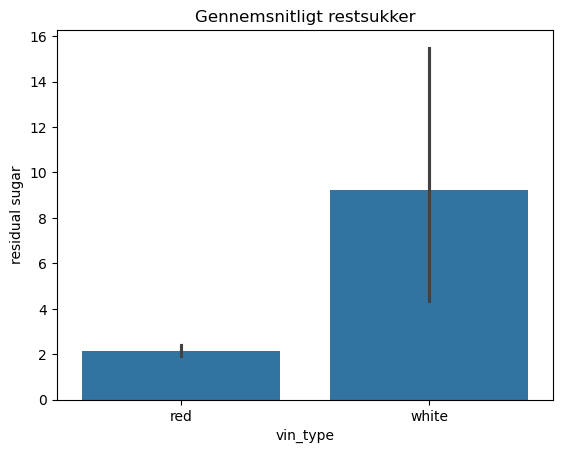


 Gennemsnitligt restsukker:
vin_type
red      2.12
white    9.24
Name: residual sugar, dtype: float64


In [37]:
sns.barplot(x='vin_type', y='residual sugar', data=vin_data)
plt.title("Gennemsnitligt restsukker")
plt.show()

print("\n Gennemsnitligt restsukker:")
print(vin_data.groupby("vin_type")["residual sugar"].mean())

Gennemsnitligt restsukker er betydeligt højere for hvidvin 9.24 sammenlignet med rødvin 2.12.

## Forholdet mellem alkohol, restsukker og vinens kvalitet
Nu undersøges forholdet mellem alkoholindhold, restsukker og vinens kvalitet ved hjælp af scatterplots og korrelationer.

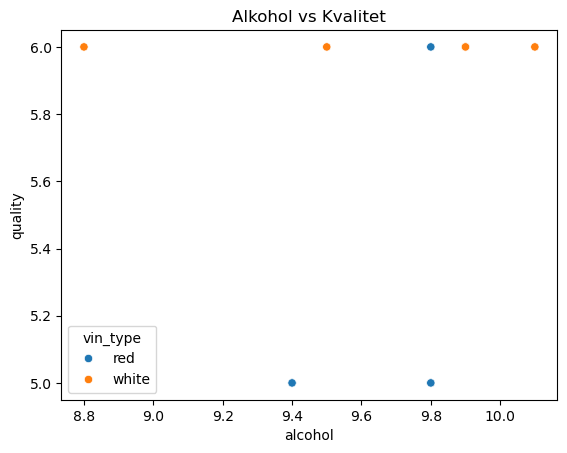

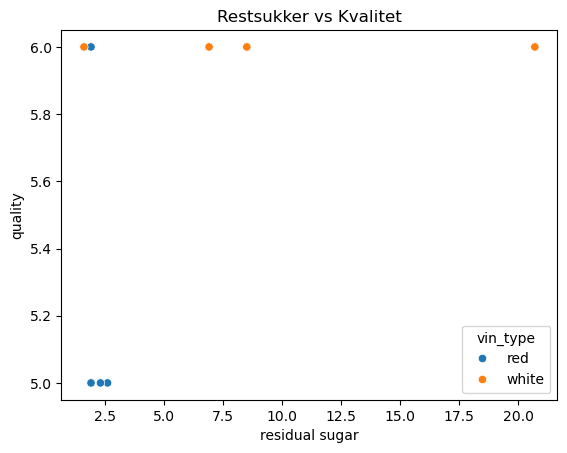


 Korrelation mellem alkohol og kvalitet:
          alcohol   quality
alcohol  1.000000  0.091863
quality  0.091863  1.000000

 Korrelation mellem restsukker og kvalitet:
                residual sugar   quality
residual sugar        1.000000  0.503224
quality               0.503224  1.000000


In [40]:
# Alkohol vs kvalitet
sns.scatterplot(x="alcohol", y="quality", hue="vin_type", data=vin_data)
plt.title("Alkohol vs Kvalitet")
plt.show()

# Restsukker vs kvalitet
sns.scatterplot(x="residual sugar", y="quality", hue="vin_type", data=vin_data)
plt.title("Restsukker vs Kvalitet")
plt.show()

# Korrelationer
print("\n Korrelation mellem alkohol og kvalitet:")
print(vin_data[["alcohol", "quality"]].corr())

print("\n Korrelation mellem restsukker og kvalitet:")
print(vin_data[["residual sugar", "quality"]].corr())

Alkoholindholdet har en meget svag positiv sammenhæng med vinens kvalitet (korrelation: 0.091863). Alkohol ser derfor næsten ikke ud til at påvirke kvaliteten i særlig stor grad.

Restsukker har en moderat positiv sammenhæng med kvaliteten (korrelation: 0.503224). Det ser ud til, at sødere vine i gennemsnit vurderes som højere kvalitet.

# Task 8:
## Hvad Forbrugere og vinforhandlere kan være interesserede i
Forbrugere er interesserede i at vælge vine baseret på deres smag og madkombinationer, mens vinforhandlere fokuserer på at forudsige efterspørgslen og optimere lagerstyring.

### Forbrugere

Hvordan vælger jeg vin efter mine smagspræferencer og budget?

Hvilke vine giver den bedste værdi for pengene?

Hvilken vin passer til specifikke retter?

### Vinforhandlere

Hvilke vine er de mest populære?

Hvordan kan jeg optimere lagerbeholdningen baseret på kvalitet og efterspørgsel?

Hvad definerer værdien af at forudsige en vins popularitet?

# Task 9:
## Opdeling af de aggregerede data i fem og ti subsets ved at opdele pH-atributten i intervaller
pH-værdierne i datasættet opdeles i 5 og 10 intervaller for at analysere fordelingen af pH-niveauerne. Dette giver indsigt i, hvordan pH-værdierne er fordelt i datasættet, og hvilke intervaller der har den højeste tæthed.

In [45]:
rødvin['pH_bin_5'] = pd.cut(rødvin['pH'], bins=5)
print(rødvin['pH_bin_5'])

0       (3.502, 3.756]
1       (2.994, 3.248]
2       (3.248, 3.502]
3       (2.994, 3.248]
4       (3.502, 3.756]
             ...      
1594    (3.248, 3.502]
1595    (3.502, 3.756]
1596    (3.248, 3.502]
1597    (3.502, 3.756]
1598    (3.248, 3.502]
Name: pH_bin_5, Length: 1599, dtype: category
Categories (5, interval[float64, right]): [(2.739, 2.994] < (2.994, 3.248] < (3.248, 3.502] < (3.502, 3.756] < (3.756, 4.01]]


In [46]:
rødvin['pH_bin_10'] = pd.cut(rødvin['pH'], bins=10)
print(rødvin['pH_bin_10'])

0       (3.502, 3.629]
1       (3.121, 3.248]
2       (3.248, 3.375]
3       (3.121, 3.248]
4       (3.502, 3.629]
             ...      
1594    (3.375, 3.502]
1595    (3.502, 3.629]
1596    (3.375, 3.502]
1597    (3.502, 3.629]
1598    (3.375, 3.502]
Name: pH_bin_10, Length: 1599, dtype: category
Categories (10, interval[float64, right]): [(2.739, 2.867] < (2.867, 2.994] < (2.994, 3.121] < (3.121, 3.248] ... (3.502, 3.629] < (3.629, 3.756] < (3.756, 3.883] < (3.883, 4.01]]


### Udregner højest subset tæthed

In [48]:
density_10 = rødvin.groupby('pH_bin_10', observed=False)['density'].mean()
highest_density_subset = density_10.idxmax()

### viser intervallet med den højeste tæthed.

In [50]:
print(f"Højest subset tæthed: {highest_density_subset}")

Højest subset tæthed: (2.739, 2.867]


### Viser tæthedsværdierne for hvert interval

In [52]:
print(density_10)

pH_bin_10
(2.739, 2.867]    1.000200
(2.867, 2.994]    0.997939
(2.994, 3.121]    0.997864
(3.121, 3.248]    0.997331
(3.248, 3.375]    0.996618
(3.375, 3.502]    0.996339
(3.502, 3.629]    0.995946
(3.629, 3.756]    0.994848
(3.756, 3.883]    0.994117
(3.883, 4.01]     0.992665
Name: density, dtype: float64


# Task 10:
## Laver en korrelationsmatrix og heatmap for dataene. Find hvilken vinattribut der har størst og lavest indflydelse på vinens kvalitet. Er der andre stærkt korrelerede attributter, som ikke er vinens kvalitet?

### korrelationsmatrix og et heatmap for alle dataene og undersøger det

In [55]:
rødvin_encoded = pd.get_dummies(rødvin, drop_first=True)
correlation_matrix = rødvin_encoded.corr()

### korrelationsmatrixen for at udforske relationerne

In [57]:
print(correlation_matrix)

                          fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.000000         -0.256131     0.671703   
volatile acidity              -0.256131          1.000000    -0.552496   
citric acid                    0.671703         -0.552496     1.000000   
residual sugar                 0.114777          0.001918     0.143577   
chlorides                      0.093705          0.061298     0.203823   
free sulfur dioxide           -0.153794         -0.010504    -0.060978   
total sulfur dioxide          -0.113181          0.076470     0.035533   
density                        0.668047          0.022026     0.364947   
pH                            -0.682978          0.234937    -0.541904   
sulphates                      0.183006         -0.260987     0.312770   
alcohol                       -0.061668         -0.202288     0.109903   
quality                        0.124052         -0.390558     0.226373   
pH_bin_5_(2.994, 3.248]        0.51961

### vinattribut der har størst indflydelse på vinens kvalitet

In [59]:
# Antager, at 'korrelationsmatrix' inkluderer en 'quality' kolonne.
correlation_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
print(correlation_with_quality)

quality                     1.000000
alcohol                     0.476166
sulphates                   0.251397
citric acid                 0.226373
fixed acidity               0.124052
pH_bin_5_(2.994, 3.248]     0.065631
pH_bin_10_(3.121, 3.248]    0.056319
pH_bin_10_(3.756, 3.883]    0.037448
pH_bin_10_(2.994, 3.121]    0.024526
pH_bin_10_(2.867, 2.994]    0.023012
pH_bin_5_(3.756, 4.01]      0.018162
residual sugar              0.013732
pH_bin_10_(3.883, 4.01]    -0.008438
pH_bin_10_(3.248, 3.375]   -0.011379
pH_bin_10_(3.629, 3.756]   -0.019996
pH_bin_10_(3.502, 3.629]   -0.033651
pH_bin_10_(3.375, 3.502]   -0.039037
pH_bin_5_(3.502, 3.756]    -0.039644
pH_bin_5_(3.248, 3.502]    -0.043579
free sulfur dioxide        -0.050656
pH                         -0.057731
chlorides                  -0.128907
density                    -0.174919
total sulfur dioxide       -0.185100
volatile acidity           -0.390558
Name: quality, dtype: float64


## Attributen med størst indflydelse

In [61]:
most_influential = correlation_with_quality.index[1]  # udelukker 'kvalitet' 
print(f"Attributen med størst indflydelse: {most_influential}")

Attributen med størst indflydelse: alcohol


## Attributen med lavest indflydelse

In [63]:
least_influential = correlation_with_quality.index[-1]
print(f"Attributen med lavest indflydelse: {least_influential}")

Attributen med lavest indflydelse: volatile acidity


## Attributter der er stærkt korrelerede

In [65]:
# Sætter en threshold for "høj korrelation" (f.eks. |korrelation| > 0.7)
threshold = 0.7

# Opretter et DataFrame for stærkt korrelerede par
highly_correlated = correlation_matrix.unstack().reset_index()
highly_correlated.columns = ['Attribute 1', 'Attribute 2', 'Correlation']

# Filtrer duplikater og selvkorrelationer fra
highly_correlated = highly_correlated[highly_correlated['Attribute 1'] != highly_correlated['Attribute 2']]
highly_correlated = highly_correlated[highly_correlated['Correlation'].abs() > threshold]

# Sorterer efter korrelationsstyrke
highly_correlated = highly_correlated.sort_values(by='Correlation', ascending=False)

# Printer resultat
print(highly_correlated)

                  Attribute 1               Attribute 2  Correlation
371   pH_bin_5_(3.502, 3.756]  pH_bin_10_(3.502, 3.629]     0.896475
539  pH_bin_10_(3.502, 3.629]   pH_bin_5_(3.502, 3.756]     0.896475
318   pH_bin_5_(2.994, 3.248]  pH_bin_10_(3.121, 3.248]     0.806446
462  pH_bin_10_(3.121, 3.248]   pH_bin_5_(2.994, 3.248]     0.806446
399    pH_bin_5_(3.756, 4.01]   pH_bin_10_(3.883, 4.01]     0.755218
615   pH_bin_10_(3.883, 4.01]    pH_bin_5_(3.756, 4.01]     0.755218
313   pH_bin_5_(2.994, 3.248]   pH_bin_5_(3.248, 3.502]    -0.766600
337   pH_bin_5_(3.248, 3.502]   pH_bin_5_(2.994, 3.248]    -0.766600


# Task 11:
## Undersøgelse af 'residual sugar' for outliers
Her undersøges variablen 'residual sugar' for at identificere og fjerne eventuelle outliers, som kan forvrænge den statistiske analyse. Dette gøres vha. boxplot og IQR-metoden.

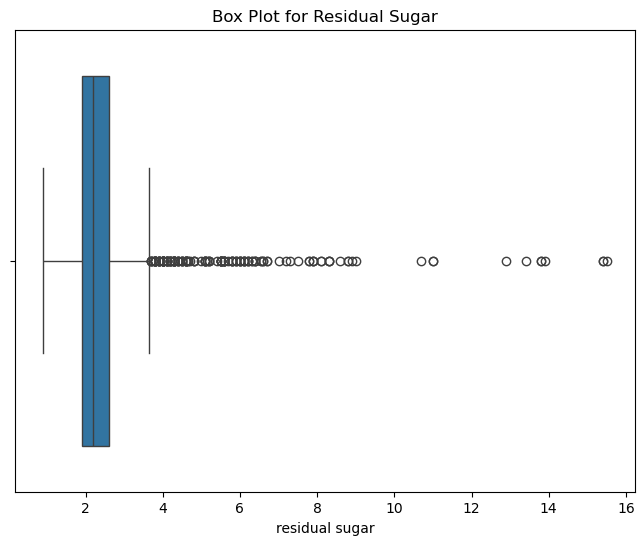

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rødvin['residual sugar'])
plt.title('Box Plot for Residual Sugar')
plt.show()

Der er blevet identificeret afvigere i datasættet.

## Afvigere er fundet på følgende rækker i dataframen

In [70]:
# Beregner kvartiler og interkvartilafstanden (IQR) for residual sugar
Q1 = rødvin['residual sugar'].quantile(0.25)
Q3 = rødvin['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Definerer grænserne for outliers baseret på IQR-metoden
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finder de rækker, hvor værdierne er uden for grænserne (outliers)
outliers = rødvin[(rødvin['residual sugar'] < lower_bound) | (rødvin['residual sugar'] > upper_bound)]

# Gemmer indeksene for rækker med outliers
outlier_rows = outliers.index

# Udskriver rækkerne med outliers
print(f"Rækker med outliers i 'residual sugar': {outlier_rows.tolist()}")

Rækker med outliers i 'residual sugar': [9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274, 275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375, 378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480, 484, 494, 501, 502, 510, 515, 516, 538, 539, 541, 554, 555, 556, 557, 558, 559, 564, 595, 606, 608, 624, 625, 645, 649, 652, 659, 690, 705, 719, 740, 800, 878, 884, 889, 903, 904, 910, 911, 913, 917, 923, 941, 944, 946, 974, 1032, 1038, 1043, 1056, 1057, 1059, 1071, 1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096, 1114, 1133, 1138, 1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239, 1244, 1257, 1276, 1288, 1289, 1295, 1296, 1307, 1331, 1358, 1373, 1388, 1394, 1406, 1412, 1423, 1434, 1435, 1437, 1441, 1445, 1471, 1474, 1476, 1478, 1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589]


Der er identificeret 155 afvigere (outliers) i variablen 'residual sugar' i datasættet.

## Fjerner rækker med afvigere

In [73]:
rødvin_cleaned = rødvin.drop(outliers.index)
print(rødvin_cleaned)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Der er nu blevet fjernet 155 outliers, da det oprindelige datasæt indeholdt 1599 rækker, og det rensede datasæt består af 1444 rækker.

## Visualisering af det nye rensede datasæt

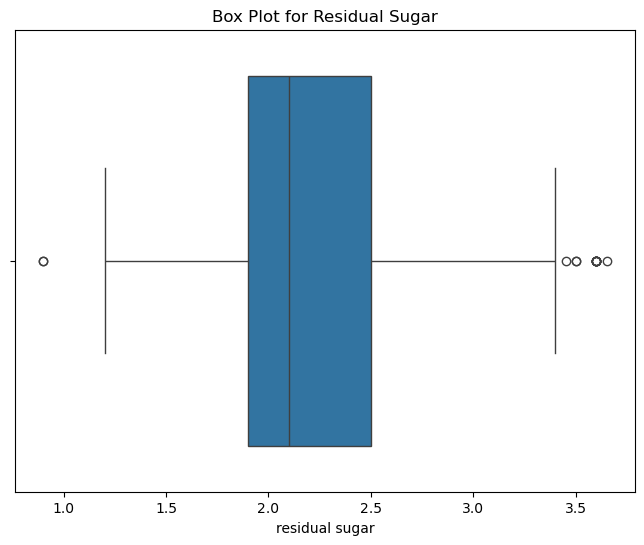

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rødvin_cleaned['residual sugar'])
plt.title('Box Plot for Residual Sugar')
plt.show()

# Task 12:
## Fjerner de attributter, der ikke er korrelerede med vinens kvalitet, samt de attributter, der er stærkt korrelerede med en anden uafhængig attribut
Her undersøges attributter, der ikke er signifikant korrelerede med vinens kvalitet under 0,3, samt attributter, der er stærkt korrelerede med andre over 0,9. De irrelevante og stærkt korrelerede attributter fjernes, og kun de mest relevante beholdes.

### Identificerer attributter, der ikke er korrelerede med vinens kvalitet.

In [79]:
# Sætter tærskelværdien for at betragte korrelation som signifikant
correlation_threshold = 0.3

# Beregner den absolutte korrelation af alle attributter med vinens kvalitet
quality_correlation = correlation_matrix['quality'].abs()

# Filtrerer de attributter, der har en signifikant korrelation med vinens kvalitet
relevant_attributes = quality_correlation[quality_correlation > correlation_threshold].index.tolist()

# Udskriver de attributter, der er korrelerede med vinens kvalitet
print(f"Attributter, der er korreleret med vinens kvalitet: {relevant_attributes}")

Attributter, der er korreleret med vinens kvalitet: ['volatile acidity', 'alcohol', 'quality']


## Identificerer attributter, der er stærkt korrelerede med andre attributter

In [81]:
high_correlation_threshold = 0.9

# Find attribute pairs with high correlation
highly_correlated_pairs = correlation_matrix.unstack().reset_index()
highly_correlated_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs[
    (highly_correlated_pairs['Correlation'].abs() > high_correlation_threshold) &
    (highly_correlated_pairs['Attribute 1'] != highly_correlated_pairs['Attribute 2'])
]

print(f"Stærkt korrelerede attributter:\n{highly_correlated_pairs}")

Stærkt korrelerede attributter:
Empty DataFrame
Columns: [Attribute 1, Attribute 2, Correlation]
Index: []


## Fjerner unødvendige attributter

In [83]:
# Fjerner de attributter, der er stærkt korrelerede med andre attributter
attributes_to_remove = set(highly_correlated_pairs['Attribute 1'])

# Laver en liste over de relevante attributter, der ikke er stærkt korrelerede med andre
final_attributes = list(set(relevant_attributes) - attributes_to_remove)

# Filtrerer dataframen ved hjælp af de relevante attributter
rødvin_filtered = rødvin[final_attributes]

# Udskriver den filtrerede dataframe
print(rødvin_filtered)

      volatile acidity  quality  alcohol
0                0.700        5      9.4
1                0.880        5      9.8
2                0.760        5      9.8
3                0.280        6      9.8
4                0.700        5      9.4
...                ...      ...      ...
1594             0.600        5     10.5
1595             0.550        6     11.2
1596             0.510        6     11.0
1597             0.645        5     10.2
1598             0.310        6     11.0

[1599 rows x 3 columns]


Efter at have fjernet de irrelevante og stærkt korrelerede attributter, indeholder den filtrerede dataframe kun de relevante attributter: volatile acidity, alcohol og quality. De andre attributter er blevet fjernet.

# Task 13:
## Anvender Principal Component Analysis (PCA) på dataene
Her anvendes PCA til at reducere dimensionaliteten af dataene ved at skabe to hovedkomponenter, som bevarer størstedelen af variationen. Dette gør det muligt at analysere dataene mere effektivt og visualisere de vigtigste mønstre.

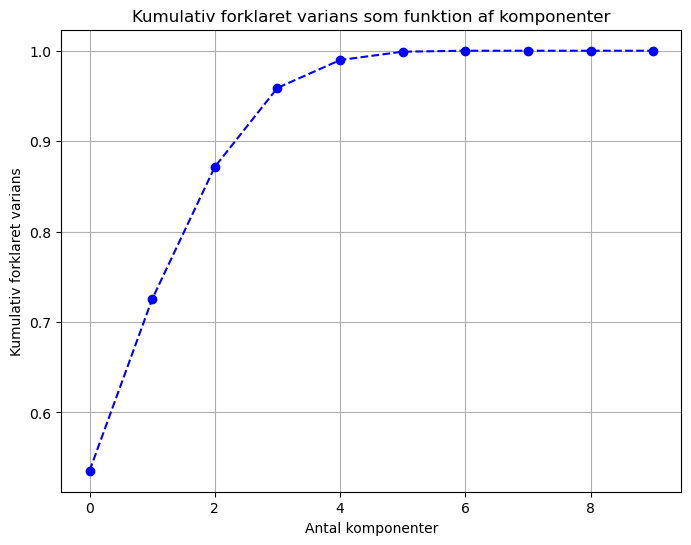

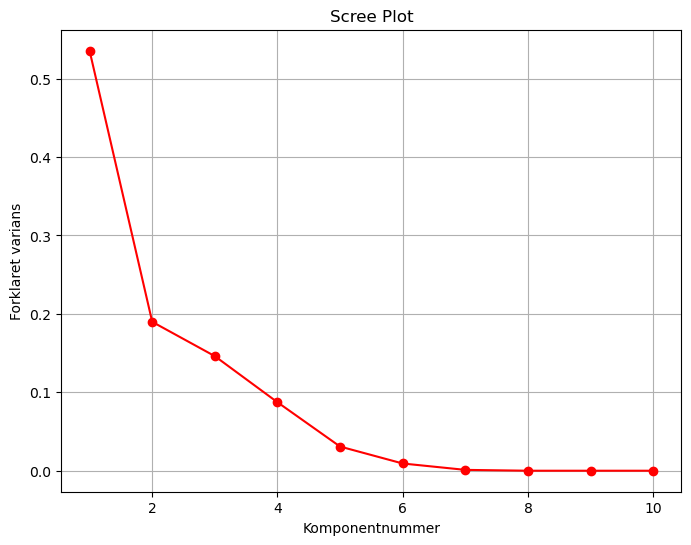

       PCA1      PCA2 vin_type
0 -2.872446 -0.764479      red
1 -2.923967 -0.377022      red
2 -2.887333 -0.132715      red
3  0.071649  1.475487      red
4 -2.872446 -0.764479      red


In [86]:
# Fjerner kolonnen vin_type den er tekst og kan ikke bruges til PCA
vin_data_numeric = vin_data.drop(columns=['vin_type'])

# Standardiser data: Gør alle features sammenlignelige
scaler = StandardScaler()
vin_data_scaled = scaler.fit_transform(vin_data_numeric)

# Udfører PCA med alle komponenter
pca_full = PCA()
pca_full.fit(vin_data_scaled)

# Beregner den forklarede varians per komponent
explained_variance = pca_full.explained_variance_ratio_

# Plotter den kumulative forklarede varians
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Antal komponenter')
plt.ylabel('Kumulativ forklaret varians')
plt.title('Kumulativ forklaret varians som funktion af komponenter')
plt.grid(True)
plt.show()

# Scree Plot (Vis egenværdierne for hver komponent)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='r')
plt.xlabel('Komponentnummer')
plt.ylabel('Forklaret varians')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Her vælges der 2 komponenter baseret på forklaringen af varians
pca = PCA(n_components=2)
vin_data_pca = pca.fit_transform(vin_data_scaled)

# Gemmer resultatet i en ny DataFrame med de valgte komponenter
pca_df = pd.DataFrame(vin_data_pca, columns=['PCA1', 'PCA2'])

# Tilføjer vin_type tilbage til den nye DataFrame
pca_df['vin_type'] = vin_data['vin_type'].values

# Udskriver den nye DataFrame med PCA resultaterne
print(pca_df.head())

Visualiseringerne (kumulativ forklaret varians og scree plot) viser, at de to første PCA-komponenter forklarer størstedelen af variationen i datasættet. Den resulterende DataFrame består nu af de to hovedkomponenter, PCA1 og PCA2, samt den oprindelige vin_type-kolonne, som er tilføjet for at bevare kontekst.

# Task 14:
## Print 10 tilfældige rækker fra det transformerede datasæt som bevis for koncept
Som bevis for konceptet udtrækkes 10 tilfældige rækker fra det reducerede datasæt. Dette viser, at PCA-transformationen er blevet anvendt korrekt, og at dataene er reduceret til to dimensioner.

In [88]:
pca_df.sample(10)

,PCA1,PCA2,vin_type
0,-2.872446,-0.764479,red
4,-2.872446,-0.764479,red
1,-2.923967,-0.377022,red
6,0.920123,1.157879,white
7,1.564389,1.734851,white
8,2.687340,0.702126,white
3,0.071649,1.475487,red
2,-2.887333,-0.132715,red
5,3.625350,-3.733774,white
9,2.687340,0.702126,white


Det transformerede datasæt viser, at PCA-transformationen er udført korrekt. Dataene er nu reduceret til to hovedkomponenter, PCA1 og PCA2, som bevarer størstedelen af variationen i datasættet. vin_type-kolonnen er tilføjet tilbage for at bevare information om vinens kategori.